<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#GLCM-Texture-Features" data-toc-modified-id="GLCM-Texture-Features-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GLCM Texture Features</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Open-the-camera-image-from-skimage-data-and-display" data-toc-modified-id="Open-the-camera-image-from-skimage-data-and-display-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Open the camera image from skimage data and display</a></span></li><li><span><a href="#Select-some-patches-from-grass-and-sky-area" data-toc-modified-id="Select-some-patches-from-grass-and-sky-area-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Select some patches from grass and sky area</a></span></li><li><span><a href="#Display-the-patches" data-toc-modified-id="Display-the-patches-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Display the patches</a></span></li><li><span><a href="#Compute-some-GLCM-properties-from-each-patch" data-toc-modified-id="Compute-some-GLCM-properties-from-each-patch-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Compute some GLCM properties from each patch</a></span></li><li><span><a href="#Plot-the-feature-values-for-grass-and-sky-(two-different-class)" data-toc-modified-id="Plot-the-feature-values-for-grass-and-sky-(two-different-class)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Plot the feature values for grass and sky (two different class)</a></span></li></ul></li><li><span><a href="#Assignment-problem-implementation" data-toc-modified-id="Assignment-problem-implementation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Assignment problem implementation</a></span><ul class="toc-item"><li><span><a href="#Toy-image-to-compute-GLCM-features/properties" data-toc-modified-id="Toy-image-to-compute-GLCM-features/properties-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Toy image to compute GLCM features/properties</a></span></li><li><span><a href="#Home-task:-write-the-code-to-compute-following-features?" data-toc-modified-id="Home-task:-write-the-code-to-compute-following-features?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Home task: write the code to compute following features?</a></span></li><li><span><a href="#Question:-02" data-toc-modified-id="Question:-02-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Question: 02</a></span></li></ul></li></ul></div>

In [1]:
# For the formatting of the jupyter-notebook
import os
from IPython.core.display import HTML
def load_style(directory = '../', name='customMac.css'):
        styles = open(os.path.join(directory, name), 'r').read()
        return HTML(styles)
load_style()

In [2]:
#======= set default plotting properties =======
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'Computer Modern Roman'
mpl.rcParams['lines.color'] = 'b'
plt.rcParams['figure.figsize'] = 7, 4.5 # default figure size

In [3]:
# 
# import matplotlib.pyplot as plt
# import numpy as np

# from skimage.feature import greycomatrix, greycoprops

## GLCM Texture Features


This example illustrates texture classification using grey level
co-occurrence matrices (GLCMs). A GLCM is a histogram of co-occurring
greyscale values at a given offset over an image.

In this example, samples of two different textures are extracted from
an image: grassy areas and sky areas. For each patch, a GLCM with
a horizontal offset of 5 is computed. Next, two features of the
GLCM matrices are computed: dissimilarity and correlation. These are
plotted to illustrate that the classes form clusters in feature space.

In a typical classification problem, the final step (not included in
this example) would be to train a classifier, such as Bayesian Classifier, K-nearest neighbor Classifiers, to label image patches from new images.

### Import Libraries

In [4]:
import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import data

### Open the camera image from skimage data and display

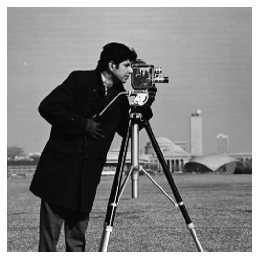

In [5]:
image = data.camera()
plt.imshow(image, cmap=plt.cm.gray,vmin=0, vmax=255)
plt.axis('off')
plt.show()

### Select some patches from grass and sky area

(-0.5, 511.5, 511.5, -0.5)

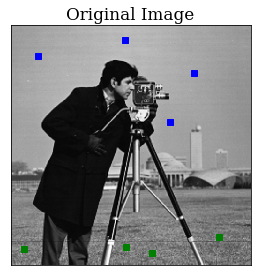

In [6]:
PatchSize = 21

# select some patches from grassy areas of the image
grass_locations = [(474, 291), (440, 433), (466, 18), (462, 236)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PatchSize,
                               loc[1]:loc[1] + PatchSize])

# select some patches from sky areas of the image
sky_locations = [(54, 48), (21, 233), (90, 380), (195, 330)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PatchSize,
                             loc[1]:loc[1] + PatchSize])

# create the figure
fig = plt.figure(figsize=(15, 15))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PatchSize / 2, y + PatchSize / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PatchSize / 2, y + PatchSize / 2, 'bs')
ax.set_title('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

### Display the patches

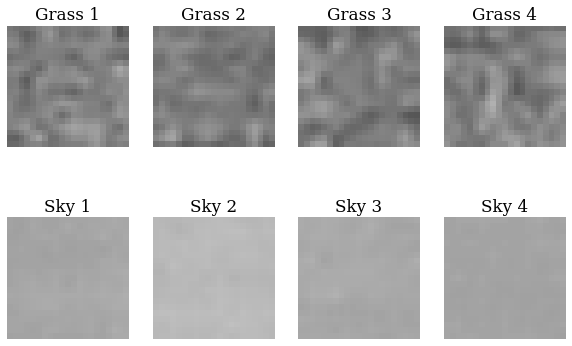

In [7]:
# create the figure
fig = plt.figure(figsize=(10, 10))

for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_title('Grass %d' % (i + 1))
    plt.axis('off')

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_title('Sky %d' % (i + 1))
    plt.axis('off')

### Compute some GLCM properties from each patch

In [8]:
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, distances = [5], angles= [0], levels= 256, symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

### Plot the feature values for grass and sky (two different class)

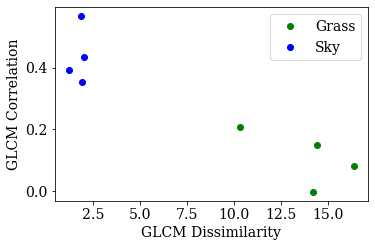

In [9]:
# create the figure
fig = plt.figure(figsize=(10, 10))

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

#fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.savefig("glcmImg.pdf")
#plt.axis('off')
plt.show()

## Assignment problem implementation

### Toy image to compute GLCM features/properties

In [10]:
img = [[0,0,0,1,2],
       [1,1,0,1,1],
       [2,2,1,0,0],
       [1,1,0,2,0],
       [0,0,1,0,1]]

In [11]:
type(img)

list

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import data

img = np.asarray(img,dtype=int)


In [13]:
type(img)

numpy.ndarray

In [18]:
glcm = greycomatrix(img, distances = [1], angles = [(-np.pi)/4],
                    levels = 4, symmetric=False, normed=True)
glcm.shape

(4, 4, 1, 1)

In [19]:
num_level = glcm.shape[0]
glcm = glcm.reshape((num_level, num_level))  # Reshaped for further computation
print(glcm.shape)
print(glcm)

(4, 4)
[[0.1875 0.1875 0.     0.    ]
 [0.125  0.125  0.1875 0.    ]
 [0.125  0.0625 0.     0.    ]
 [0.     0.     0.     0.    ]]


In [24]:
def EnergyGLCM(glcm):
    energy = np.sum((glcm ** 2))
    return energy

def ContrastGLCM(glcm):
    num_level = glcm.shape[0]
    i, j = np.ogrid[0:num_level, 0:num_level]
    weights = (i - j) ** 2
    #weights = weights.reshape((num_level, num_level, 1, 1))  # just to make compatible with glcm
    contrast = np.sum(glcm * weights)
    return contrast

def Uniformity(glcm):
    return np.sum(glcm**2)

def HomogeneityGLCM(glcm):
    num_level = glcm.shape[0]
    i, j = np.ogrid[0:num_level, 0:num_level]
    weights = (i - j) ** 2
    #weights = weights.reshape((num_level, num_level, 1, 1))  # just to make compatible with glcm
    homogeneity = np.sum(glcm/(1+ weights))
    return homogeneity
def EntopyGLCM(glcm):
    val = -np.log2(np.asarray(glcm))
    val[val==np.inf]=0
    AverageEntropy = np.sum(glcm*val)
    return AverageEntropy


In [25]:
energy = EnergyGLCM(glcm)
print(energy)
contrast = ContrastGLCM(glcm)
print(contrast)
uniformity = Uniformity(glcm)
print(uniformity)
homogeneity = HomogeneityGLCM(glcm)
print(homogeneity)
entropy = EntopyGLCM(glcm)
print(entropy)

0.15625
1.0625
0.15625
0.61875
2.7334585933443494


/Users/kundan/opt/anaconda3/envs/myPytorch/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log2


### Home task: write the code to compute following features?
- Correlation, 
- Entropy, 
- Maximum probability, 
- Inverse Element Difference Moment
- Homogeneity

### Question: 02 

Consider a binary image of size $200\times 200$ pixels, with a vertical black band extending from columns 1 to 99 and a vertical white band extending from columns 100 to 200.

1. Obtain the co-occurrence matrix of this image using the position operator ``one pixel to the right.''
2. Normalize this matrix so that its elements become probability estimates.
3. Compute Maximum probability, Correlation, Contrast, Uniformity (Energy), Homogeneity, and Entropy features.

In [26]:
glcm = np.asarray([[19600, 200],[0, 20000]],dtype=int)
glcm = glcm/np.sum(glcm)

In [27]:
energy = EnergyGLCM(glcm)
print(energy)
contrast = ContrastGLCM(glcm)
print(contrast)
uniformity = Uniformity(glcm)
print(uniformity)

0.49506325597838435
0.005025125628140704
0.49506325597838435
